# Point Classification Examples

In here we take 2 different point clusters as data and we train a model that learns what is the boundary between them

You can test the model on the following clusters: 

- circles: large circle containing a smaller circle in 2d
- moons: two interleaving half circles.
- blobs: isotropic gaussian blobs for clustering
 
Comment one or the other and run all cells to see results

## Initialization

In [430]:
import torch
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.core.display import HTML

In [424]:
# We create prediction map subdividing the entire space into small squares

res = 100 # Prediction map resolution
space = 2.5 # Prediction map space

# Prediction map coordinates
_x0 = np.linspace(-space, space, res)
_x1 = np.linspace(-space, space, res)

# Prediction map combinations
_pX = torch.tensor(np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2), dtype=torch.float32)
_pY = torch.tensor(np.zeros((res, res)) + 0.5)

In [ ]:
# Create dataset

samples = 500
noise = 0.05

# Pick one of these options:

# Circles
# X, Y = ds.make_circles(n_samples=samples, factor=0.5, noise=noise)

# Moons
X, Y = ds.make_moons(n_samples=samples, noise=noise)
X -= 0.5 # Center moon points a bit

# Blobs
# X, Y = ds.make_blobs(n_samples=samples, n_features=2, center_box=(-2, 2), cluster_std=0.2)

# Leave this uncommented
X, Y  = torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32)

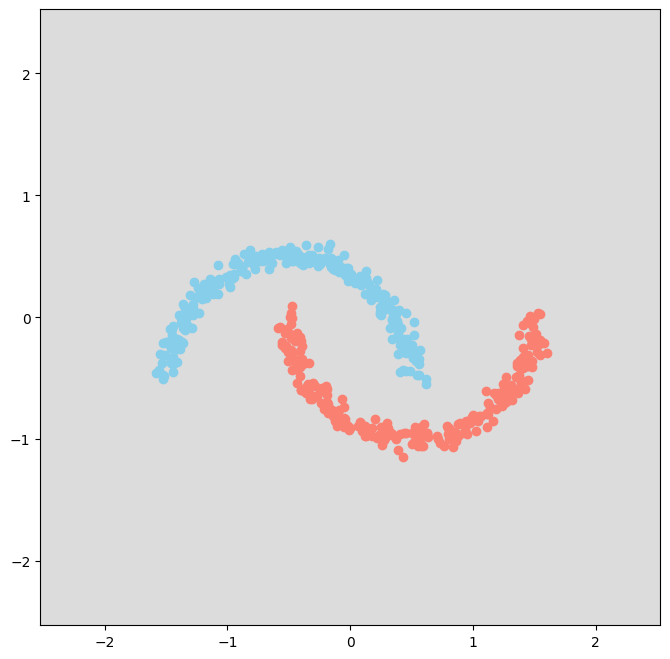

In [426]:
# Visualize training data
plt.figure(figsize=(8, 8))

_x0 = np.linspace(-space, space, res)
_x1 = np.linspace(-space, space, res)
_pY = np.zeros((res, res)) + 0.5

plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

## Neural Network Training

In [427]:
# Initialize parameters

W1 = torch.randn(2, 16)
B1 = torch.randn(16)
W2 = torch.randn(16, 1)
B2 = torch.randn(1)

parameters = [W1, B1, W2, B2]

for p in parameters:
  p.requires_grad = True


In [428]:
lr = 0.01
steps = 100000
predictions = []

for i in range(steps):
  # forward pass
  l1 = torch.tanh(X @ W1 + B1)
  l2 = torch.sigmoid(l1 @ W2 + B2)
  loss = torch.nn.functional.mse_loss(l2.view(-1), Y)

  # backwards
  for p in parameters:
    p.grad = None

  loss.backward()

  if i % 5000 == 0:
    print(f'{i}/{steps} / loss: {loss}')

    with torch.no_grad():
      pl1 = torch.tanh(_pX @ W1 + B1)
      pl2 = torch.sigmoid(pl1 @ W2 + B2)

    predictions.append(pl2)

  # optimization
  for p in parameters:
    p.data += -lr * p.grad


0/100000 / loss: 0.5974980592727661
5000/100000 / loss: 0.05508651211857796
10000/100000 / loss: 0.0349290668964386
15000/100000 / loss: 0.024038368836045265
20000/100000 / loss: 0.017437675967812538
25000/100000 / loss: 0.013230559416115284
30000/100000 / loss: 0.010417940095067024
35000/100000 / loss: 0.008453940972685814
40000/100000 / loss: 0.007029863074421883
45000/100000 / loss: 0.00596366124227643
50000/100000 / loss: 0.005143838934600353
55000/100000 / loss: 0.004498704802244902
60000/100000 / loss: 0.003980887588113546
65000/100000 / loss: 0.003558110212907195
70000/100000 / loss: 0.003207901958376169
75000/100000 / loss: 0.0029140254482626915
80000/100000 / loss: 0.0026642875745892525
85000/100000 / loss: 0.0024502037558704615
90000/100000 / loss: 0.0022647709120064974
95000/100000 / loss: 0.0021028080955147743


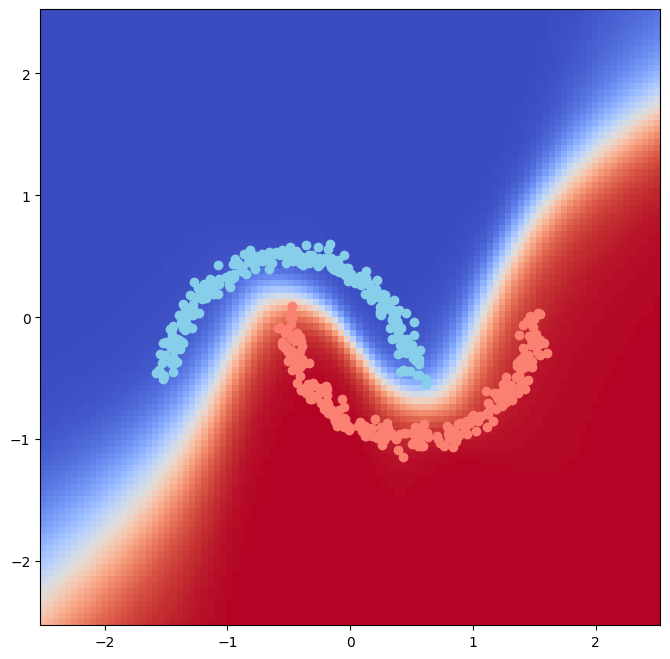

In [429]:
# Visualize prediction map
fig = plt.figure(figsize=(8, 8))

ims = []

for fr in range(len(predictions)):
  # We need to so small transpose transformation due to how pcolormesh orders values
  im = plt.pcolormesh(_x0, _x1, predictions[fr].view(100, -1).T, cmap="coolwarm", animated=True)

  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())
